# Betting strategies 
# _England Premiere League Match Results & Odds Dataset_

## I. Introduction

> You do not know anything about sports betting or you want to implement a new strategy? This notebook will help you understand this world, and also provide you a **betting strategy** that you will be able to apply on your own.

In this report, we will take the example of Football, one of the sports with the highest number of bets. More precisely, we will concentrate on **England Premiere League match results**, because its great number of matches will allow us to test and build a strategy.

### Explanations on betting's vocabulary
First, let's set up the vocabulary. While betting,  _odds_ are linked to each bet you make. Betting odds tell you how likely an event is to happen, and represents how much money you could win if your bet realizes itself.

> For example, you are on a betting website. If the odd is set as 1.40 for "Home team win" and you put 10€ on this odd, if the Home team actually wins (so your prediction realizes itself), you will earn 4€ and get back your first 10€.

There is the possibility to bet on different type of results before a match. Here, we will take into account the bets on the match result (Home team wins, Away team wins, Draw match).


## II. Dataset & Variables

The dataset we chose groups the results of the English Premier League matches **from 2008 to 2019**. It was taken from the following website:
We also added some features to this dataset, taken from this website:

The variables available are about the matches: the match's **ID**, the match's **date time**, the **Home team**, the **Away team**, the final **number of goals**, the **match result** (Home Team win, Away Team win or Draw Match), the **team's ranking** of the previous Football season (static rank at the end of the past season), the **referee** for the match, the number of **shots**, the number of **fouls**, and the other variables are not directly linked to the match statistics. These other variables are **the odds set before the match** by **different betting websites**. These odds are set on the **final result** of a match (Home Team win, Away Team win, Draw Match).

## III. Goal of the project & models

The goal of the project is to build a model that can predict the following output : Home Team win, Away Team win or Draw match.
Of course, the model will not predict perfectly the output, but by knowing which match result have the most chances to happen can create some winning bets. This will be done through **Classifications** models.

We decided to build two models, taking into acount different independant variables: 
- One time, we will try to predict a match result based on the **betting websites' predictions**, that can be seen **through the odds** websites put on the possible result. 

- Another time we will use the **Match Statistics**, with the rank of each team, the number of shots/fouls, the number of goals, etc. 

In order to obtain these predictions, we will also try two classifications models: **Descision Trees** and **Logistic Regressions**. 

> In the end, we will evaluate the relevance of each classification model, and also define **which independant variables** (Odds or Statitics of the Match) **explained the best the Match Result**.

## IV. Methodology

1. At first, we will import the packages that we will need during this analyse.
2. Then, we will upload, clean and add the necessary variables to complete the Dataset.
3. Some variables will be transformed the variables in a way we can use them properly.
4. Following this point, we will create scatter plots to show the repartition between the realized prediction vs non realized prediction. (When the match Odd is set on Home win => 0 the match result is Home did not win, 1 when Home won) 
5. Consequently, we will create the classification models (Logistic regression, then decision trees). It will be done for each match result, using one time the match statistics, the other time using the odds. 
6. We will also evaluate the accuracy of the models and create confusion matrixes to have a visual representation of the project.
7. Finally, we will draw some conclusions that we can be retrieved from these classfications and methodologies.

> We will also analyse our models and try to tink about how we could improve them and how they could be useful for business.


## 1. Packages

In [1570]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. The dataset

The following table shows the 10 first rows of the dataset. It was uploaded from a csv file, and we decided yo name it **_data_**.

In [1571]:
#We use the Dataset with the games of the season 2008 to 2018
data = pd.read_csv('https://raw.githubusercontent.com/abdul232/DMML_Team_Rolex/master/data/England_2008_2018_Premiere_League_Final.csv',sep=";")

# view of the first rows 
data


,Match_ID,Date,HomeTeam,AwayTeam,Home ex-Rank,Home Team Goals,Away ex-Rank,Away Team Goals,Match Result,Referee,...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69
0,1,16.08.08,Arsenal,West Brom,6,1,18,0,H,H Webb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,16.08.08,Bolton,Stoke,16,3,19,1,H,C Foy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,16.08.08,Everton,Blackburn,5,2,7,3,A,A Marriner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,16.08.08,Hull,Fulham,20,2,17,1,H,P Walton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,16.08.08,Middlesbrough,Tottenham,13,2,11,1,H,M Atkinson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,16.08.08,Sunderland,Liverpool,15,0,4,1,A,A Wiley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,16.08.08,West Ham,Wigan,10,2,14,1,H,S Bennett,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,17.08.08,Aston Villa,Man City,6,4,9,2,H,P Dowd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,17.08.08,Chelsea,Portsmouth,2,4,8,0,H,M Dean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,17.08.08,Man United,Newcastle,1,1,12,1,D,M Riley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1572]:
data.shape

(4180, 70)

As we can see, we have some _NaN_ variables in our data due to a format change, so we have to remove them.

In [1573]:
data = data.drop(["Unnamed: 49", "Unnamed: 50", "Unnamed: 51","Unnamed: 52","Unnamed: 53","Unnamed: 54","Unnamed: 55","Unnamed: 56","Unnamed: 57","Unnamed: 58","Unnamed: 59","Unnamed: 60","Unnamed: 61","Unnamed: 62","Unnamed: 63","Unnamed: 64","Unnamed: 65","Unnamed: 66","Unnamed: 67","Unnamed: 68","Unnamed: 69"], axis=1)

#We have a new dimension
data.shape

(4180, 49)

In [1574]:
data

,Match_ID,Date,HomeTeam,AwayTeam,Home ex-Rank,Home Team Goals,Away ex-Rank,Away Team Goals,Match Result,Referee,...,Betbrain Average Home,Betbrain Maximum Draw,Betbrain Average Draw,Betbrain Maximum Away,Betbrain Average Away,Betbrain Numbers of bookmakers Goals,Betbrain Max > 2.5 Goals,Betbrain Average > 2.5 Goals,Betbrain Max < 2.5 Goals,Betbrain Average < 2.5 Goals
0,1,16.08.08,Arsenal,West Brom,6,1,18,0,H,H Webb,...,1.22,6.25,5.60,17.00,13.52,37,1.71,1.65,2.25,2.14
1,2,16.08.08,Bolton,Stoke,16,3,19,1,H,C Foy,...,1.81,3.51,3.35,5.30,4.54,37,2.33,2.16,1.70,1.64
2,3,16.08.08,Everton,Blackburn,5,2,7,3,A,A Marriner,...,1.98,3.39,3.25,4.21,3.86,37,2.34,2.17,1.70,1.63
3,4,16.08.08,Hull,Fulham,20,2,17,1,H,P Walton,...,2.56,3.38,3.23,2.89,2.68,37,2.32,2.15,1.69,1.64
4,5,16.08.08,Middlesbrough,Tottenham,13,2,11,1,H,M Atkinson,...,3.19,3.55,3.31,2.30,2.20,37,1.90,1.81,2.12,1.92
5,6,16.08.08,Sunderland,Liverpool,15,0,4,1,A,A Wiley,...,5.24,3.75,3.50,1.76,1.68,37,2.22,2.08,1.76,1.69
6,7,16.08.08,West Ham,Wigan,10,2,14,1,H,S Bennett,...,1.94,3.40,3.27,4.40,3.98,37,2.22,2.10,1.75,1.68
7,8,17.08.08,Aston Villa,Man City,6,4,9,2,H,P Dowd,...,1.84,3.55,3.32,5.05,4.36,34,2.33,2.12,1.73,1.66
8,9,17.08.08,Chelsea,Portsmouth,2,4,8,0,H,M Dean,...,1.32,5.20,4.69,12.00,10.05,36,2.01,1.90,1.93,1.83
9,10,17.08.08,Man United,Newcastle,1,1,12,1,D,M Riley,...,1.28,5.50,5.03,13.00,11.00,36,1.83,1.72,2.20,2.03



We have also seen that some rows were showing _NaN_ data due to missing odds, so we removed them too.

In [1575]:
data.dropna(inplace=True)
data.shape

(4176, 49)

Finally, this dataset (without the _NaN_ ) counts **4'176** rows for **49** columns.


In [1576]:
data = data.drop(["Home Team Goals","Away Team Goals","Betbrain Numbers of bookmakers 1X2","Betbrain Average Home","Betbrain Maximum Draw","Betbrain Average Draw","Betbrain Maximum Away","Betbrain Average Away","Betbrain Numbers of bookmakers Goals","Betbrain Max > 2.5 Goals","Betbrain Average > 2.5 Goals","Betbrain Max < 2.5 Goals","Betbrain Average < 2.5 Goals"], axis=1)
data

,Match_ID,Date,HomeTeam,AwayTeam,Home ex-Rank,Away ex-Rank,Match Result,Referee,Home Team Shots,Away Team Shots,...,Interwetten Home,Interwetten Draw,Interwetten Away,William Hill Home,William Hill Draw,William Hill Away,VC Bet Home,VC Bet Draw,VC Bet Away,Betbrain Maximum Home
0,1,16.08.08,Arsenal,West Brom,6,18,H,H Webb,24,5,...,1.20,5.20,11.00,1.17,5.50,12.00,1.25,6.00,13.00,1.26
1,2,16.08.08,Bolton,Stoke,16,19,H,C Foy,14,8,...,1.75,3.30,4.20,1.80,3.10,4.00,1.85,3.40,4.80,1.87
2,3,16.08.08,Everton,Blackburn,5,7,A,A Marriner,10,15,...,2.00,3.20,3.30,1.95,3.10,3.50,2.05,3.30,4.00,2.06
3,4,16.08.08,Hull,Fulham,20,17,H,P Walton,11,12,...,2.40,3.20,2.60,2.50,2.90,2.62,2.60,3.40,2.80,2.70
4,5,16.08.08,Middlesbrough,Tottenham,13,11,H,M Atkinson,14,8,...,2.90,3.20,2.20,2.90,3.20,2.15,3.20,3.40,2.30,3.57
5,6,16.08.08,Sunderland,Liverpool,15,4,A,A Wiley,6,14,...,4.50,3.50,1.65,5.50,3.30,1.57,5.50,3.80,1.65,5.91
6,7,16.08.08,West Ham,Wigan,10,14,H,S Bennett,15,22,...,1.80,3.30,3.80,1.83,3.20,3.75,1.90,3.50,4.35,2.09
7,8,17.08.08,Aston Villa,Man City,6,9,H,P Dowd,14,13,...,2.00,3.20,3.30,1.91,3.20,3.50,1.90,3.50,4.35,2.00
8,9,17.08.08,Chelsea,Portsmouth,2,8,H,M Dean,18,12,...,1.30,4.40,8.50,1.30,4.20,8.50,1.33,5.00,11.00,1.36
9,10,17.08.08,Man United,Newcastle,1,12,D,M Riley,18,11,...,1.30,4.40,8.50,1.25,4.50,10.00,1.28,5.50,12.00,1.32


## 3. Changing variables types

Now, as we settled up the **types of the variables**. We will change some as int (integer), the date as datetime, while other will remain objects.

In [1577]:
data.dtypes

Match_ID                       int64
Date                          object
HomeTeam                      object
AwayTeam                      object
Home ex-Rank                   int64
Away ex-Rank                   int64
Match Result                  object
Referee                       object
Home Team Shots                int64
Away Team Shots                int64
Home Team Shots on Target      int64
Away Team Shots on Target      int64
Home Fouls Committed           int64
Away Fouls Committed           int64
Home Corners                   int64
Away Corners                   int64
Home Yellow Cards              int64
Away Yellow Cards              int64
Home Red Cards                 int64
Away Red Cards                 int64
B365 Home                    float64
B365 Draw                    float64
B365 Away                    float64
Bet&Win Home                 float64
Bet&Win Draw                 float64
Bet&Win Away                 float64
Interwetten Home             float64
I

In [1578]:
#We have to change the type of some variable (integer)
data['Match_ID'] = data.Match_ID.astype(int)

In [1579]:
#We have to change the type of some variable (integer)
data[['Home Team Shots','Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']]= data[['Home Team Shots','Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']].astype(int)

In [1580]:
#We have to change the type of some variable (Date)
data['Date'] = pd.to_datetime(data['Date'],)


In [1581]:
data.dtypes

Match_ID                              int64
Date                         datetime64[ns]
HomeTeam                             object
AwayTeam                             object
Home ex-Rank                          int64
Away ex-Rank                          int64
Match Result                         object
Referee                              object
Home Team Shots                       int64
Away Team Shots                       int64
Home Team Shots on Target             int64
Away Team Shots on Target             int64
Home Fouls Committed                  int64
Away Fouls Committed                  int64
Home Corners                          int64
Away Corners                          int64
Home Yellow Cards                     int64
Away Yellow Cards                     int64
Home Red Cards                        int64
Away Red Cards                        int64
B365 Home                           float64
B365 Draw                           float64
B365 Away                       


## 4. Tendencies through scatter plots

A match has 3 different possible results (the Home Team wins, the Away Team wins or a Draw match). Each of these results are likely to happen, or not happen. This fact shows **the need of a binary variable**, for each of the match result (Home, Away or Draw).

In [1582]:
#We wo, one for the Home team wins, one for the draws and one for the Away team wins
data = pd.get_dummies(data, columns=['Match Result'])

To build a betting strategy, it is first relevant to know how frequently the betting companies makes right predicting or not. So, in order to understand this fact, we will build **three different scatter plot**, showing the realised and not realised predictions :

- When the official result is the victory of the home team crossed with the "Home team win" odd.
- When the official result is the victory of the away team crossed with the "Away team win" odd.
- When the official result is draw match crossed with the "Draw"odd.

We will build scatter plots for each of the 3 differents possible results we have in a match, and compare them with the odds.

### Home team wins scenario: if the Home team wins the output is 1,  otherwise it's 0.

In [1583]:
# number of Homewin vs No Home win
Homewin = data["Match Result_H"].value_counts()[1]
NoHomewin = data["Match Result_H"].value_counts()[0]
print("Home won:", Homewin)
print("Home did not win:", NoHomewin)

Home won: 1929
Home did not win: 2247


The most common class is the Home Team did not win so we use it for calculate the **base rate**.

In [1584]:
# Base rate 
# the base rate of the No Home Win
BaseRate = NoHomewin/data['Match Result_H'].count()
print("Base Rate:", BaseRate)

Base Rate: 0.5380747126436781


### Interpretation:
We can see that we have a almost 50-50 repartition.

[Text(0, 0.5, 'Home team won [1]'),
 Text(0.5, 0, 'Website Odd while Home Team wins')]

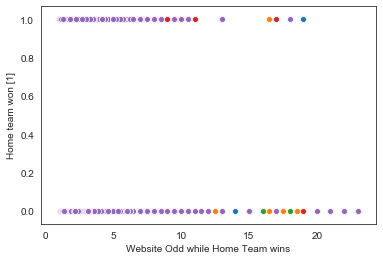

In [1585]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


#tips = sns.load_dataset(data)

a_B365_Home = sns.scatterplot(x="B365 Home", y="Match Result_H", data=data)

a_BetWin_Home = sns.scatterplot(x="Bet&Win Home", y="Match Result_H", data=data)

a_Interwetten_Home = sns.scatterplot(x="Interwetten Home", y="Match Result_H", data=data)

a_WilliamHill_Home = sns.scatterplot(x="William Hill Home", y="Match Result_H", data=data)

a_VCBet_Home = sns.scatterplot(x="VC Bet Home", y="Match Result_H", data=data)

a_VCBet_Home.set(xlabel='Website Odd while Home Team wins', ylabel='Home team won [1]')


As we can see the higher the odd is, the less a team has chance to win. However, it still happen sometimes.


### Draw match scenario: if the result is draw, the output is 1,  otherwise it's 0.

In [1586]:
# number of Draw vs No Draw
Draw = data["Match Result_D"].value_counts()[1]
NoDraw = data["Match Result_D"].value_counts()[0]
print("Draw match:", Draw)
print("No Draw match:", NoDraw)

Draw match: 1037
No Draw match: 3139


In [1587]:
# Base rate 
# the base rate of the No Draw
BaseRateD = NoDraw/data['Match Result_D'].count()
print("Base Rate", BaseRateD)

Base Rate 0.751676245210728


### Interpretation: 
We can see that we have a almost 75-25 repartition.

[Text(0, 0.5, 'Draw [1]'), Text(0.5, 0, 'Website Odd while Draw match')]

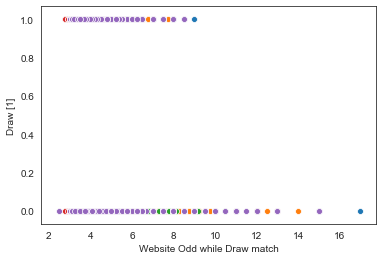

In [1588]:
a_B365_Draw = sns.scatterplot(x="B365 Draw", y="Match Result_D", data=data)

a_BetWin_Draw = sns.scatterplot(x="Bet&Win Draw", y="Match Result_D", data=data)

a_Interwetten_Draw = sns.scatterplot(x="Interwetten Draw", y="Match Result_D", data=data)

a_WilliamHill_Draw = sns.scatterplot(x="William Hill Draw", y="Match Result_D", data=data)

a_VCBet_Draw = sns.scatterplot(x="VC Bet Draw", y="Match Result_D", data=data)

a_VCBet_Draw.set(xlabel='Website Odd while Draw match', ylabel='Draw [1]')

We can observe the same trend as the previous graph for the small odds. However, the high odds just never realize themselves.


### Away team wins scenario: if the Away team wins the output is 1,  otherwise it's 0.

In [1589]:
# number of Away win vs No Away win
Awaywin = data["Match Result_A"].value_counts()[1]
NoAwaywin = data["Match Result_A"].value_counts()[0]
print("Away won:", Awaywin)
print("Away did not win:", NoAwaywin)

Away won: 1210
Away did not win: 2966


In [1590]:
# Base rate 
# the base rate of the No Home Win
BaseRateA = NoAwaywin/data['Match Result_A'].count()
print("Base Rate", BaseRateA)

Base Rate 0.7102490421455939


### Interpretation:
We can see that we have a almost 70-30 repartition.

[Text(0, 0.5, 'Away team won [1]'),
 Text(0.5, 0, 'Website Odd while Away Team wins')]

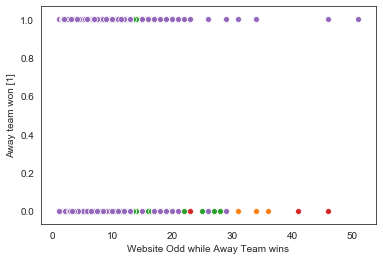

In [1591]:
a_B365_Away = sns.scatterplot(x="B365 Away", y="Match Result_A", data=data)

a_BetWin_Away = sns.scatterplot(x="Bet&Win Away", y="Match Result_A", data=data)

a_Interwetten_Away = sns.scatterplot(x="Interwetten Away", y="Match Result_A", data=data)

a_WilliamHill_Away = sns.scatterplot(x="William Hill Away", y="Match Result_A", data=data)

a_VCBet_Away = sns.scatterplot(x="VC Bet Away", y="Match Result_H", data=data)

a_VCBet_Away.set(xlabel='Website Odd while Away Team wins', ylabel='Away team won [1]')


In [1592]:
sum = 1 - BaseRate + 1- BaseRateD + 1 - BaseRateA
print(sum)

0.9999999999999999


We can observe the same trend as the previous graph. If we sum all the percentage of 1 - Base rate we obtain 1, so de distribution is perfect.  


## 5. Comparison between two Classification models using the odds

We will compare two model:

> - **Logistic Regressions**: comparing the Odd prediction to the statistics of the match prediction
> - **Decision Trees**: comparing the Odd prediction to the statistics of the match prediction


Before building the models, we will **normalise** the odds numbers to create a common scale for all the odds.


In [1593]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

cols_to_norm = ['B365 Home','B365 Draw','B365 Away','Bet&Win Home','Bet&Win Draw','Bet&Win Away','Interwetten Home','Interwetten Draw','Interwetten Away','William Hill Home','William Hill Draw','William Hill Away','VC Bet Home','VC Bet Draw','VC Bet Away']

scaler = MinMaxScaler()
data[cols_to_norm] = scaler.fit_transform(data[cols_to_norm])


data[cols_to_norm].head(10)

,B365 Home,B365 Draw,B365 Away,Bet&Win Home,Bet&Win Draw,Bet&Win Away,Interwetten Home,Interwetten Draw,Interwetten Away,William Hill Home,William Hill Draw,William Hill Away,VC Bet Home,VC Bet Draw,VC Bet Away
0,0.006381,0.250000,0.348044,0.008521,0.234234,0.254373,0.007916,0.248619,0.354376,0.006015,0.264706,0.242424,0.009112,0.280,0.237866
1,0.035096,0.035714,0.084754,0.035088,0.036036,0.093777,0.036939,0.038674,0.110473,0.037594,0.029412,0.064171,0.036446,0.072,0.073406
2,0.042844,0.021429,0.072217,0.040100,0.031532,0.082306,0.050132,0.027624,0.078192,0.045113,0.029412,0.053030,0.045558,0.064,0.057361
3,0.070191,0.014286,0.042126,0.070175,0.022523,0.043590,0.071240,0.027624,0.053085,0.072682,0.009804,0.033422,0.070615,0.072,0.033293
4,0.097539,0.028571,0.028335,0.087719,0.027027,0.033553,0.097625,0.027624,0.038737,0.092732,0.039216,0.022950,0.097950,0.072,0.023265
5,0.202370,0.042857,0.013791,0.197995,0.040541,0.015486,0.182058,0.060773,0.019010,0.223058,0.049020,0.010027,0.202733,0.104,0.010229
6,0.038742,0.028571,0.077232,0.042607,0.027027,0.076570,0.039578,0.038674,0.096126,0.039098,0.039216,0.058601,0.038724,0.080,0.064380
7,0.038742,0.028571,0.080491,0.045113,0.027027,0.070835,0.050132,0.027624,0.078192,0.043108,0.039216,0.053030,0.038724,0.080,0.064380
8,0.012306,0.142857,0.222668,0.012531,0.166667,0.204187,0.013193,0.160221,0.264706,0.012531,0.137255,0.164439,0.012756,0.200,0.197754
9,0.010483,0.178571,0.247743,0.012531,0.166667,0.204187,0.013193,0.160221,0.264706,0.010025,0.166667,0.197861,0.010478,0.240,0.217810


## 5.1 Logistic Regression

### I. With the odds

>We will first construct a 3 models based on the odds, one for each possible game results (Home win, Away win, Draw), using a **Logistic Regression** 

Here is **the 1st logistic regression for Home Team Win:**

In [1594]:
feature_names = ['B365 Home','Bet&Win Home','Interwetten Home','William Hill Home','VC Bet Home']

X = np.array(data[feature_names])
y = np.array(data["Match Result_H"])

In [1595]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)


In [1596]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [1597]:
LR.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [1598]:
# best regulariser parameter
LR.C_

array([0.05])

In [1599]:

LR.score(X_train,y_train)

0.6422155688622755

The train set accuracy is about 64%, so we predict correclty 64% if it was a Home win or not. We had a default rate of almost 46% for the Home win, it's not a very good prediction but our model allows to predict something significant.

In [1600]:

LR.score(X_test, y_test)

0.6016746411483254

The test set accuracy is about 60%. Unfortunately, the prediction based on the test set are less good. We could optimize it by doing a cross Validation.

In [1601]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR.predict(X_train))

array([[1209,  572],
       [ 623,  936]])

We can already see the repartition of results and predictions, but just below the confusion matrix shows it in a more readable way:

Confusion matrix, without normalization


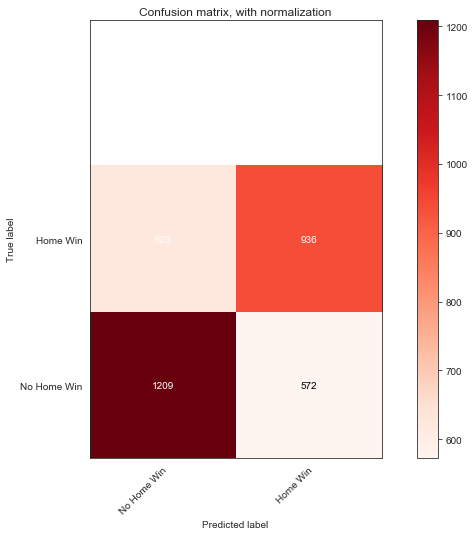

In [1602]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LR.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Home Win", "Home Win"])
    ax.yaxis.set_ticklabels(["No Home Win", "Home Win"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')


### Interpretation of the CONFUSION MATRIX 1
> We can see we have a majority of true positive and true negative which is coherent with the result we foud above. The matrix allows us to have a better visual understanding.

In [1603]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)



0.6206896551724138
0.600384862091084


### Interpretation of the precision recall:

>We have a precision of 62.06%, so over all the predicted Home wins we have 62.42% of them that actually were Home wins.

>Only 60.04% of the Home wins have been correctly identified.


**Here is the 2nd logistic regression for Draws:**

In [1604]:
feature_names = ['B365 Draw','Bet&Win Draw','Interwetten Draw','William Hill Draw','VC Bet Draw']

X = np.array(data[feature_names])
y = np.array(data["Match Result_D"])

In [1605]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [1606]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LRD = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [1607]:
LRD.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [1608]:
# best regulariser parameter
LRD.C_

array([0.])

Here we do not have asatisfying result : we should take sample of the data to have a better repartition of the [0,1] representing the results of the matches. 
### MORE

In [1609]:
# train accuracy
LRD.score(X_train,y_train)

0.7547904191616767

The train set accuracy is about 75.48%, so we predict correclty 75.48% if it was a Draw or not. We had a default rate of almost 24.8% for Draw, it's not a very good prediction.

In [1610]:
# test accuracy
LRD.score(X_test, y_test)

0.7392344497607656

Same as for the train accuracy if we comparate the test accuracy to the base rate, it's not a good prediction

In [1611]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LRD.predict(X_train))

array([[2521,    0],
       [ 819,    0]])

Confusion matrix, with normalization


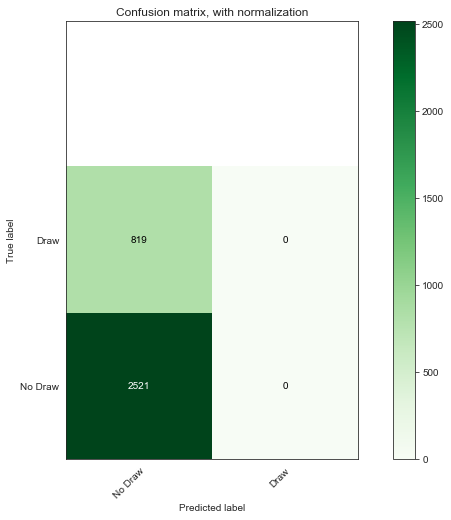

In [1612]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LRD.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Draw", "Draw"])
    ax.yaxis.set_ticklabels(["No Draw", "Draw"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')



### Interpretation of the CONFUSION MATRIX 2
> We can see that we have no true positive and no false negative. This is due to the fact that the proportion of draw are too small comparing to the number of game, so we prefer to let down the model predicting the draws for the rest of our work.

In [1613]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.0
0.0


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Here is the 3rd logistic regression for Away wins:

In [1614]:
feature_names = ['B365 Away','Bet&Win Away','Interwetten Away','William Hill Away','VC Bet Away']

X = np.array(data[feature_names])
y = np.array(data["Match Result_A"])

In [1615]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [1616]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LRA = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [1617]:
LRA.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [1618]:
# best regulariser parameter
LRA.C_

array([0.])

In [1619]:
# train accuracy
LRA.score(X_train,y_train)

0.7119760479041917

In [1620]:
# test accuracy
LRA.score(X_test, y_test)

0.7033492822966507

**Same observation as for the draw, our accuracy rate of the training and the test set are to close to the base rate so we can't use this model to predict an away win or not.**

In [1621]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LRA.predict(X_train))

array([[2378,    0],
       [ 962,    0]])

Confusion matrix, with normalization


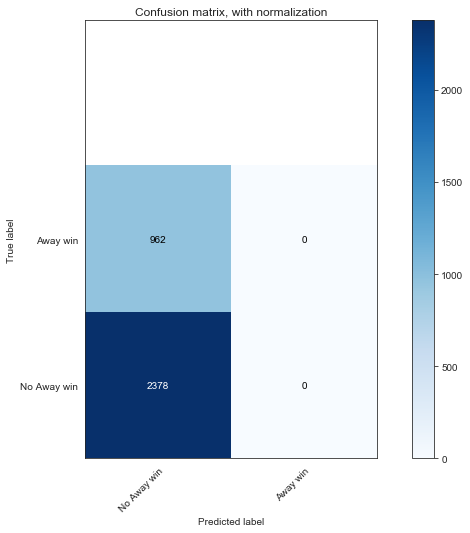

In [1622]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LRA.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Away win", "Away win"])
    ax.yaxis.set_ticklabels(["No Away win", "Away win"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')



### Interpretation of the CONFUSION MATRIX 3 with odds
> As for the draws we don't have true positive anf false negative probably to the distribution of away wins versus no away wins. We also let down this model using the ods for the Away wins.

In [1623]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.0
0.0


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### II. With the Match Statistics

>We will now construct 3 models based on the games'statistics, one for each possible game results (Home win, Away win, Draw), using a **Logistic Regression** 

__Note:__ We didn't know how to use the previous statistics to do predictions about the result of a game, because we didn't know how to use time series. So we use the statisics of the actual game to check the relevance of games'statistics for predictions

**Logistic Regression for Home win with statistics**


In [1624]:
feature_names = ["Home ex-Rank","Home Team Shots","Away ex-Rank", "Away Team Shots","Home Team Shots on Target", "Away Team Shots on Target", "Home Fouls Committed", "Away Fouls Committed", "Home Corners", "Away Corners", "Home Yellow Cards", "Away Yellow Cards", "Home Red Cards", "Away Red Cards"]
#feature_names = ['B365 Home']
X = np.array(data[feature_names])
y = np.array(data["Match Result_H"])

In [1625]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [1626]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR_MS = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [1627]:
LR_MS.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [1628]:
# best regulariser parameter
LR_MS.C_

array([2.78])

In [1629]:
# train accuracy
LR_MS.score(X_train,y_train)

0.7143712574850299

In [1630]:
# test accuracy
LR_MS.score(X_test, y_test)

0.6854066985645934

### Interpretation:
We  have a better accuracy for the training set and the test set with the game's statistics for the Home win. In comparaison to the Default rate(almoste 46%) of an Home win, so this model works better for predictions. 

In [1631]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR_MS.predict(X_train))

array([[1360,  421],
       [ 533, 1026]])

Confusion matrix, with normalization


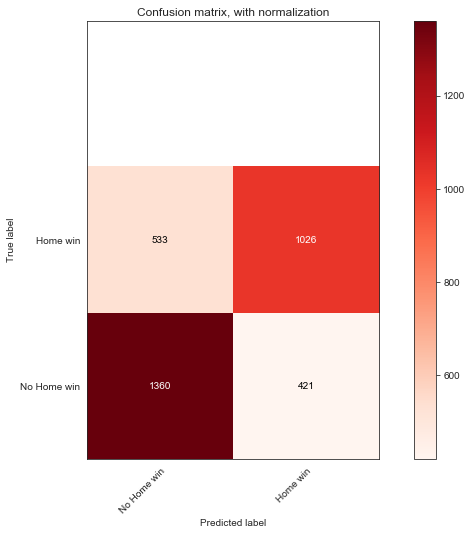

In [1632]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LR_MS.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Home win", "Home win"])
    ax.yaxis.set_ticklabels(["No Home win", "Home win"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')

### Interpretation of the CONFUSION MATRIX 1 with statistics:

We can see that we have a majority of true labels, and the propostions of true positie and false negative are very close.

In [1633]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)


0.7090532135452661
0.6581141757536882


### Interpretation of the precision recall:

>We have a precision of 70.91%, so over all the predicted Home wins we have 70.91% of them that actually were Home wins.

>Only 65.81% of the Home wins have been correctly identified.

In comparaison to the model using odds, we have a better precision and recall using statistics, this model could is more relevant.

**Logistic Regression for Draws with statistics**

In [1634]:
feature_names = ["Home ex-Rank","Home Team Shots","Away ex-Rank", "Away Team Shots","Home Team Shots on Target", "Away Team Shots on Target", "Home Fouls Committed", "Away Fouls Committed", "Home Corners", "Away Corners", "Home Yellow Cards", "Away Yellow Cards"]
#feature_names = ['B365 Home']
X = np.array(data[feature_names])
y = np.array(data["Match Result_D"])

In [1635]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [1636]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR_MSD = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [1637]:
LR_MSD.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [1638]:
# best regulariser parameter
LR_MSD.C_

array([0.01])

In [1639]:
# train accuracy
LR_MSD.score(X_train,y_train)

0.7550898203592814

In [1640]:
# test accuracy
LR_MSD.score(X_test, y_test)

0.7380382775119617

### Interpretation
We face the same problem we had for the odds, the training set and test set for the draw model are to close to the base rate. We can't use this model.

In [1641]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR_MSD.predict(X_train))

array([[2521,    0],
       [ 818,    1]])

Confusion matrix, with normalization


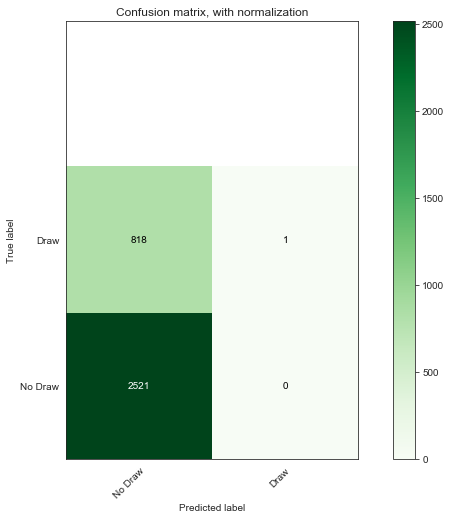

In [1642]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LR_MSD.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Draw", "Draw"])
    ax.yaxis.set_ticklabels(["No Draw", "Draw"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')

### Interpretation of the CONFUSION MATRIX 2 with statistics:
Due to the distribution of draws and no draws, the model is not able to predicte true positive and false negative.

In [1643]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

1.0
0.001221001221001221


**Logistic Regression for Away win with statistics**

In [1644]:
feature_names = ["Home ex-Rank","Home Team Shots","Away ex-Rank", "Away Team Shots","Home Team Shots on Target", "Away Team Shots on Target", "Home Fouls Committed", "Away Fouls Committed", "Home Corners", "Away Corners", "Home Yellow Cards", "Away Yellow Cards", "Home Red Cards", "Away Red Cards"]
#feature_names = ['B365 Home']
X = np.array(data[feature_names])
y = np.array(data["Match Result_A"])

In [1645]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [1646]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR_MSA = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [1647]:
LR_MSA.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [1648]:
# best regulariser parameter
LR_MSA.C_

array([0.05])

In [1649]:
# train accuracy
LR_MSA.score(X_train,y_train)

0.7778443113772455

In [1650]:
# test accuracy
LR_MSA.score(X_test, y_test)

0.7607655502392344

### Interpretation:
The accuracy of the training set and the test set are very close to the base rate so let see the confusion matrix to have a better understanding of the situation.

In [1651]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR_MSA.predict(X_train))

array([[2190,  188],
       [ 554,  408]])

Confusion matrix, with normalization


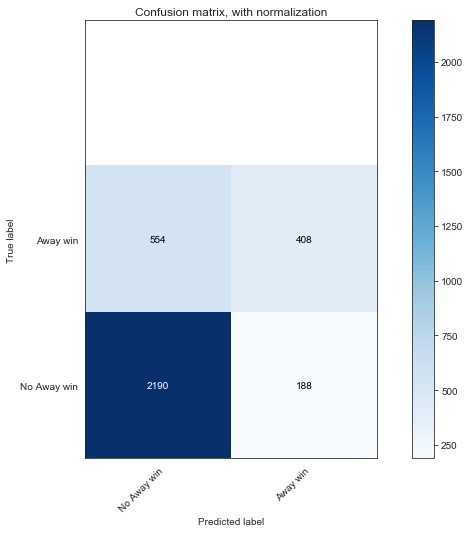

In [1652]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LR_MSA.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Away win", "Away win"])
    ax.yaxis.set_ticklabels(["No Away win", "Away win"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')



### Interpretation of the CONFUSION MATRIX 3 with statistics:
We have an intersting distribution  comparing to the same confusion matrix with odds. Even if the base rate is close to the accuracy. Here we have true positives and false negatives, our model can predict if a game is an away win or not.

In [1653]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.6845637583892618
0.42411642411642414


### Interpretation of the precision recall:

>We have a precision of 68.46%, so over all the predicted Away wins we have 70.91% of them that actually were Away wins.

>Only 42.41% of the Away wins have been correctly identified.

In comparaison to the model using odds, even if the recall is low, we have a precision and recall using statistics for the away win, this model is a way more relevant than the one with the odds.

### 5.2 Decision Trees

#### I. With the Odds

**Decision Tree for Home win**

In [1654]:
from sklearn.tree import DecisionTreeClassifier

In [1655]:
feature_names = ['B365 Home','Bet&Win Home','Interwetten Home','William Hill Home','VC Bet Home']

X = data[feature_names]
y = data["Match Result_H"]


In [1656]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [1657]:
clf = DecisionTreeClassifier(criterion='entropy')

In [1658]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1659]:
# test accuracy
clf.score(X_test,y_test)

0.5466507177033493

In [1660]:
# depth of the decision tree
Depth = clf.get_depth()
Depth

44

### Interpretation:
We have an accuracy of 53.83%, it's very close to the base rate and our Depth is too large, we are facing an overfitting problem. We have to find our optimal depth to optimize our model.

In [1661]:
#clf = DecisionTreeClassifier(criterion='entropy')
scores = [clf.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

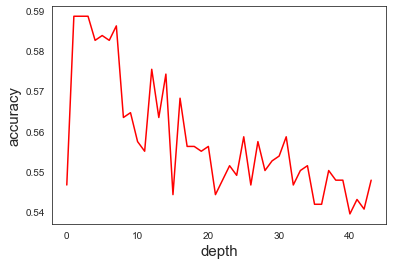

In [1662]:
plt.plot(scores,"r")
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [1663]:
Max_Depth = np.argmax(scores)
print("The optimal Depth is", Max_Depth)

The optimal Maximum Depth is 1


In [1664]:
clfMax = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [1665]:
clfMax.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1666]:
clfMax.score(X_test,y_test)

0.5885167464114832

We have a better accuracy with the optimization of the Depth, but as we can see it's lower than the accuracy we founded with the logistic regression.

In [1667]:
 from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.10570469798657718
0.040410519563822966


### Interpretation of the precision recall:

>We have a precision of 10.57%, so over all the predicted Home wins we have 10.57% of them that actually were Home wins.

>Only 4.04% of the Home wins have been correctly identified.

In comparaison to the logistic regression model, the decision tree is very bad and can't predict the Home wins.

**Decision Tree for Draw**

In [1668]:
feature_namesD = ['B365 Draw','Bet&Win Draw','Interwetten Draw','William Hill Draw','VC Bet Draw']

X = data[feature_names]
y = data["Match Result_D"]


In [1669]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [1670]:
clfD = DecisionTreeClassifier(criterion='entropy')

In [1671]:
clfD.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1672]:
# test accuracy
clfD.score(X_test,y_test)

0.6244019138755981

In [1673]:
# depth of the decision tree
Depth = clfD.get_depth()

In [1674]:
scores = [clfD.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

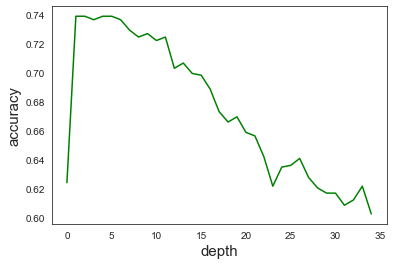

In [1675]:
plt.plot(scores,"g")
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [1676]:
Max_Depth = np.argmax(scores)
print("The optimal Maximum Depth is", Max_Depth)

The optimal Maximum Depth is 1


In [1677]:
clfMaxD = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [1678]:
clfMaxD.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1679]:
clfMaxD.score(X_test,y_test)

0.7392344497607656

In [1680]:
 from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.20973154362416108
0.15262515262515264


### Interpretation of the precision recall:

>We have a precision of 20.97%, so over all the predicted Draws we have 20.97% of them that actually were Draws.

>Only 15.26% of the Home wins have been correctly identified.

The decision tree model is very bad and is not able to do good predictions but in comparaison to the logistic regression model, this one is able to do predictions.

**Decision Tree for Away win**

In [1681]:
feature_namesA = ['B365 Away','Bet&Win Away','Interwetten Away','William Hill Away','VC Bet Away']

X = data[feature_names]
y = data["Match Result_A"]


In [1682]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [1683]:
clfA = DecisionTreeClassifier(criterion='entropy')

In [1684]:
clfA.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1685]:
# test accuracy
clfA.score(X_test,y_test)

0.6507177033492823

In [1686]:
# depth of the decision tree
Depth = clfA.get_depth()

In [1687]:
scores = [clfA.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

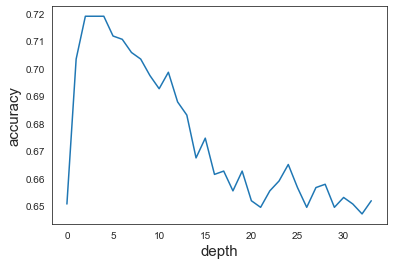

In [1688]:
plt.plot(scores)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [1689]:
Max_Depth = np.argmax(scores)
print("The optimal Maximum Depth is", Max_Depth)

The optimal Maximum Depth is 2


In [1690]:
clfMaxA = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [1691]:
clfMaxA.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1692]:
clfMaxA.score(X_test,y_test)

0.7188995215311005

In [1693]:
 from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.6845637583892618
0.42411642411642414


### Interpretation of the precision recall:

>We have a precision of 68.46%, so over all the predicted Draws we have 68.46% of them that actually were Draws.

>Only 42.42% of the Home wins have been correctly identified.

The decision tree model is way better for predicting the Away wins than the Logistic regression Model.

### II. With the Match Statistics

**Match Statistics for Home win**

In [1694]:
feature_names = ['Home ex-Rank', 'Home Team Shots', 'Away ex-Rank', 'Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']

X = np.array(data[feature_names])
y = np.array(data["Match Result_H"])

In [1695]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [1696]:
clfHS = DecisionTreeClassifier(criterion='entropy')

In [1697]:
clfHS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1698]:
# test accuracy
clfHS.score(X_test,y_test)

0.604066985645933

In [1699]:
# depth of the decision tree
clfHS.get_depth()

24

In [1700]:
scores = [clfHS.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

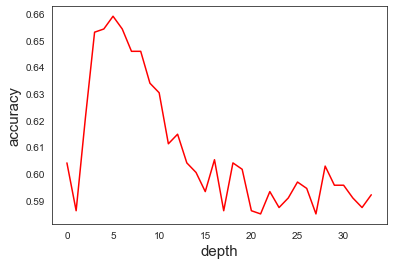

In [1701]:
plt.plot(scores, "r")
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [1702]:
Max_Depth = np.argmax(scores)
print("The optimal Maximum Depth is", Max_Depth)

The optimal Maximum Depth is 5


In [1703]:
clfMaxHS = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [1704]:
clfMaxHS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1705]:
clfMaxHS.score(X_test,y_test)

0.6590909090909091

In [1706]:
 from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.10570469798657718
0.040410519563822966


**Match Statistics for Draw**

In [1707]:
feature_names = ['Home ex-Rank', 'Home Team Shots', 'Away ex-Rank', 'Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']

X = np.array(data[feature_names])
y = np.array(data["Match Result_D"])

In [1708]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [1709]:
clfDS = DecisionTreeClassifier(criterion='entropy')

In [1710]:
clfDS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1711]:
# test accuracy
clfDS.score(X_test,y_test)

0.6279904306220095

In [1712]:
# depth of the decision tree
clfDS.get_depth()

34

In [1713]:
scores = [clfDS.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

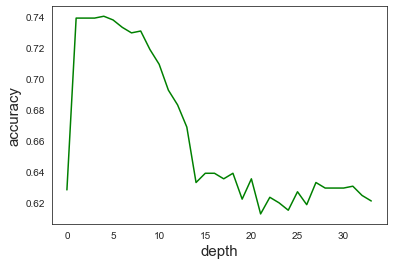

In [1714]:
plt.plot(scores,"g")
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [1715]:
Max_Depth = np.argmax(scores)
print("The optimal Maximum Depth is", Max_Depth)

The optimal Maximum Depth is 4


In [1716]:
clfMaxDS = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [1717]:
clfMaxDS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1718]:
clfMaxDS.score(X_test,y_test)

0.7404306220095693

In [1719]:
 from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.20973154362416108
0.15262515262515264


**Match Statistics for Away**

In [1720]:
feature_names = ['Home ex-Rank', 'Home Team Shots', 'Away ex-Rank', 'Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']

X = np.array(data[feature_names])
y = np.array(data["Match Result_A"])

In [1721]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [1722]:
clfAS = DecisionTreeClassifier(criterion='entropy')

In [1723]:
clfAS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1724]:
# test accuracy
clfAS.score(X_test,y_test)

0.7009569377990431

In [1725]:
# depth of the decision tree
clfAS.get_depth()

23

In [1726]:
scores = [clfAS.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

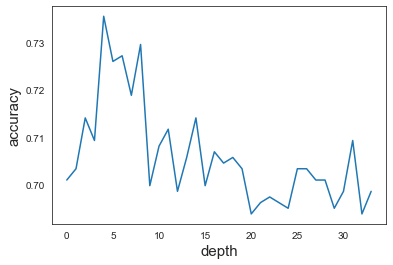

In [1727]:
plt.plot(scores)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [1728]:
Max_Depth = np.argmax(scores)
print("The optimal Maximum Depth is", Max_Depth)

The optimal Maximum Depth is 4


In [1729]:
clfMaxAS = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [1730]:
clfMaxAS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1731]:
clfMaxAS.score(X_test,y_test)

0.7356459330143541

In [1732]:
 from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.6845637583892618
0.42411642411642414


# Conclusion